Импортируем библиотеки

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [128]:
df = pd.read_excel('data/data.xlsx', index_col=0) 

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


In [130]:
df

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,0,0,0,3,0
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,0,0,0,3,0
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,0,0,0,3,0
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,...,0,0,0,0,0,0,0,0,4,0
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,414.542,...,0,0,0,0,0,0,0,0,0,0
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,485.621,...,0,0,0,0,0,0,0,0,0,0
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,545.742,...,1,0,0,0,0,0,0,0,0,0
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,522.635,...,0,0,0,0,0,0,0,0,0,0


Пропущенные значения

In [131]:
missing = df.isnull().sum()
if missing.sum() > 0:
    print(f"\nПропущенные значения:\n{missing[missing > 0]}")
else:
    print("\nПропущенных значений нет")


Пропущенные значения:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


Посмотрим на статсистику целевых переменных

In [132]:
target_vars = ['IC50, mM', 'CC50, mM', 'SI']
print(f"\nСтатистика целевых переменных:")
print(df[target_vars].describe())



Статистика целевых переменных:
          IC50, mM     CC50, mM            SI
count  1001.000000  1001.000000   1001.000000
mean    222.805156   589.110728     72.508823
std     402.169734   642.867508    684.482739
min       0.003517     0.700808      0.011489
25%      12.515396    99.999036      1.433333
50%      46.585183   411.039342      3.846154
75%     224.975928   894.089176     16.566667
max    4128.529377  4538.976189  15620.600000


Детальный анализ целевых переменных


IC50, mM:
Среднее: 222.805
Медиана: 46.585
Стандартное отклонение: 402.170
Коэффициент вариации: 1.805
Асимметрия: 3.669
Эксцесс: 22.332

CC50, mM:
Среднее: 589.111
Медиана: 411.039
Стандартное отклонение: 642.868
Коэффициент вариации: 1.091
Асимметрия: 1.970
Эксцесс: 5.645

SI:
Среднее: 72.509
Медиана: 3.846
Стандартное отклонение: 684.483
Коэффициент вариации: 9.440
Асимметрия: 17.986
Эксцесс: 359.608


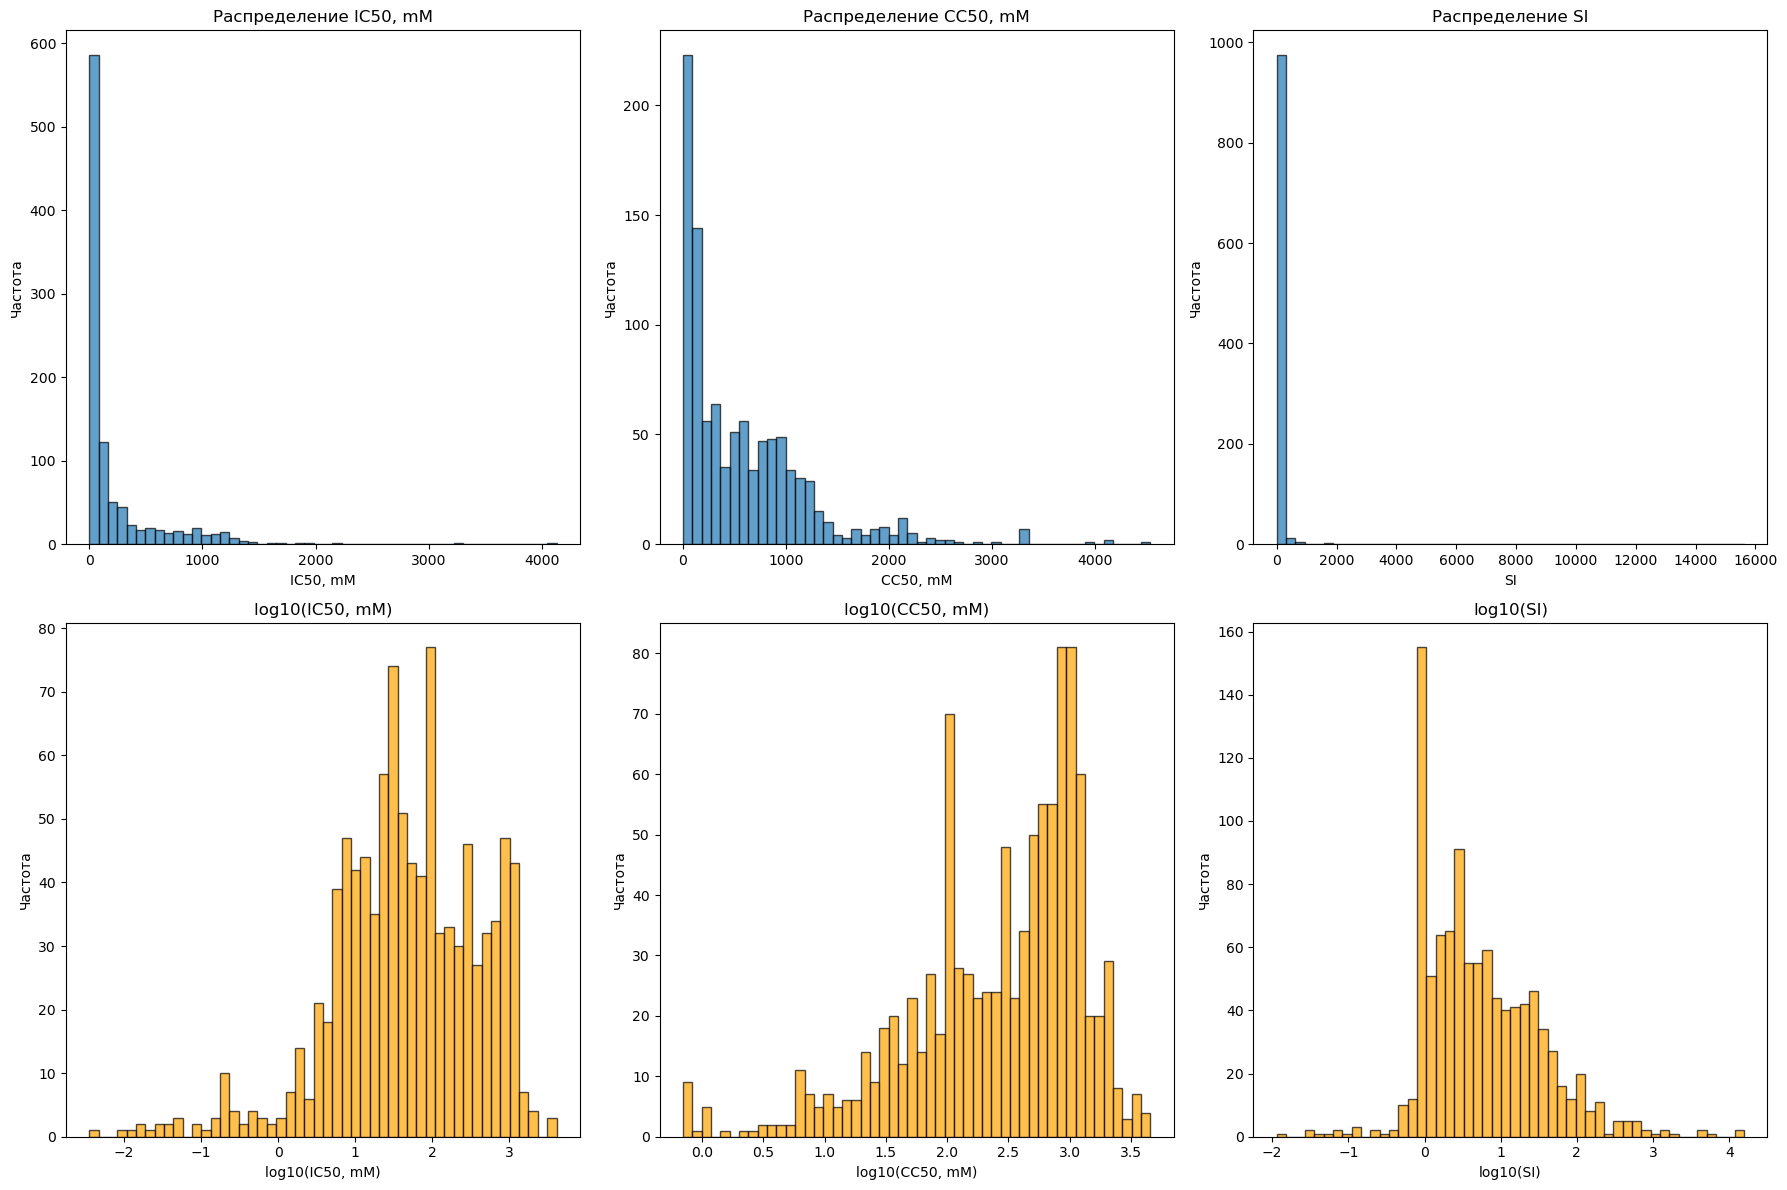

In [133]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
for i, var in enumerate(target_vars):
    
    axes[0, i].hist(df[var], bins=50, alpha=0.7, edgecolor='black')
    axes[0, i].set_title(f'Распределение {var}')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Частота')
    

    log_values = np.log10(df[var] + 1e-10) 
    axes[1, i].hist(log_values, bins=50, alpha=0.7, edgecolor='black', color='orange')
    axes[1, i].set_title(f'log10({var})')
    axes[1, i].set_xlabel(f'log10({var})')
    axes[1, i].set_ylabel('Частота')
    
    print(f"\n{var}:")
    print(f"Среднее: {df[var].mean():.3f}")
    print(f"Медиана: {df[var].median():.3f}")
    print(f"Стандартное отклонение: {df[var].std():.3f}")
    print(f"Коэффициент вариации: {df[var].std()/df[var].mean():.3f}")
    print(f"Асимметрия: {stats.skew(df[var]):.3f}")
    print(f"Эксцесс: {stats.kurtosis(df[var]):.3f}")

plt.tight_layout()
plt.savefig('target_variables_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Какие промежуточные выводы мы можем сделать:
При работе с данными необходимо их логарифмическое преобразование, так как

- Все три переменные демонстрируют экстремальную правостороннюю асимметрию
- IC50 и SI имеют практически экспоненциальное распределение
- CC50 показывает более умеренную, но все же значительную асимметрию

После логарифмического преобразования:

- log10(IC50): Распределение становится практически нормальным с небольшой бимодальностью
- log10(CC50): Значительное улучшение, приближение к нормальности с возможной бимодальностью
- log10(SI): Существенная нормализация, хотя остается небольшая правосторонняя асимметрия

На логарифмических шкалах IC50 и CC50 просматривается бимодальность, что может указывать на:

- Наличие двух различных классов соединений в датасете
- Разные механизмы действия препаратов
- Необходимость кластерного анализа для выявления подгрупп



Корреляционный анализ

Корреляция между целевыми переменными:
          IC50, mM  CC50, mM        SI
IC50, mM  1.000000  0.521346 -0.056604
CC50, mM  0.521346  1.000000 -0.006818
SI       -0.056604 -0.006818  1.000000


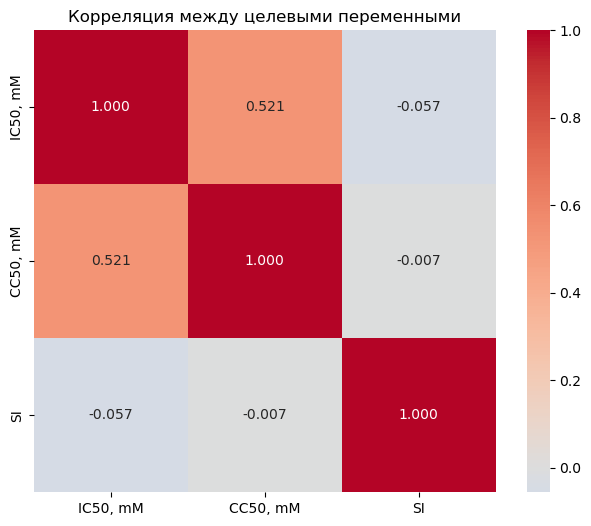


Топ-10 признаков, наиболее коррелированных с IC50, mM:
  VSA_EState4: 0.274
  Chi2n: 0.257
  PEOE_VSA7: 0.256
  Chi2v: 0.249
  fr_Ar_NH: 0.246
  fr_Nhpyrrole: 0.246
  Chi4v: 0.244
  Chi4n: 0.243
  Chi3n: 0.240
  Chi3v: 0.238

Топ-10 признаков, наиболее коррелированных с CC50, mM:
  MolMR: 0.310
  LabuteASA: 0.309
  MolWt: 0.306
  ExactMolWt: 0.306
  HeavyAtomCount: 0.305
  Chi0: 0.305
  Chi1: 0.304
  HeavyAtomMolWt: 0.303
  Kappa1: 0.302
  Chi1v: 0.302

Топ-10 признаков, наиболее коррелированных с SI:
  BalabanJ: 0.163
  fr_NH2: 0.160
  RingCount: 0.124
  fr_Al_COO: 0.102
  fr_COO2: 0.101
  fr_COO: 0.101
  NumAromaticRings: 0.088
  VSA_EState4: 0.088
  FpDensityMorgan1: 0.087
  VSA_EState6: 0.083


In [134]:
target_corr = df[target_vars].corr()
print("Корреляция между целевыми переменными:")
print(target_corr)


plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Корреляция между целевыми переменными')
plt.savefig('target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


numeric_cols = df.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_cols if col not in target_vars and col != df.columns[0]]

top_correlations = {}
for target in target_vars:
    correlations = df[feature_cols + [target]].corr()[target].abs().sort_values(ascending=False)
    top_correlations[target] = correlations[1:11]  
    
    print(f"\nТоп-10 признаков, наиболее коррелированных с {target}:")
    for feature, corr in top_correlations[target].items():
        print(f"  {feature}: {corr:.3f}")

Выводы по корреляционному анализу:

умеренная положительная корреляция (0.521) между IC50 и CC50

SI имеет слабые корреляции с IC50 (-0.057) и CC50 (-0.007)

Таким образом, SI не может быть предсказан через IC50/CC50 из-за слабых корреляций. Модели для SI будут использовать разные паттерны в данных.

 Обнаружение выбросов


IC50, mM:
  Выбросы по IQR: 147 (14.7%)
  Выбросы по Z-score (log): 13 (1.3%)

CC50, mM:
  Выбросы по IQR: 39 (3.9%)
  Выбросы по Z-score (log): 16 (1.6%)

SI:
  Выбросы по IQR: 125 (12.5%)
  Выбросы по Z-score (log): 10 (1.0%)


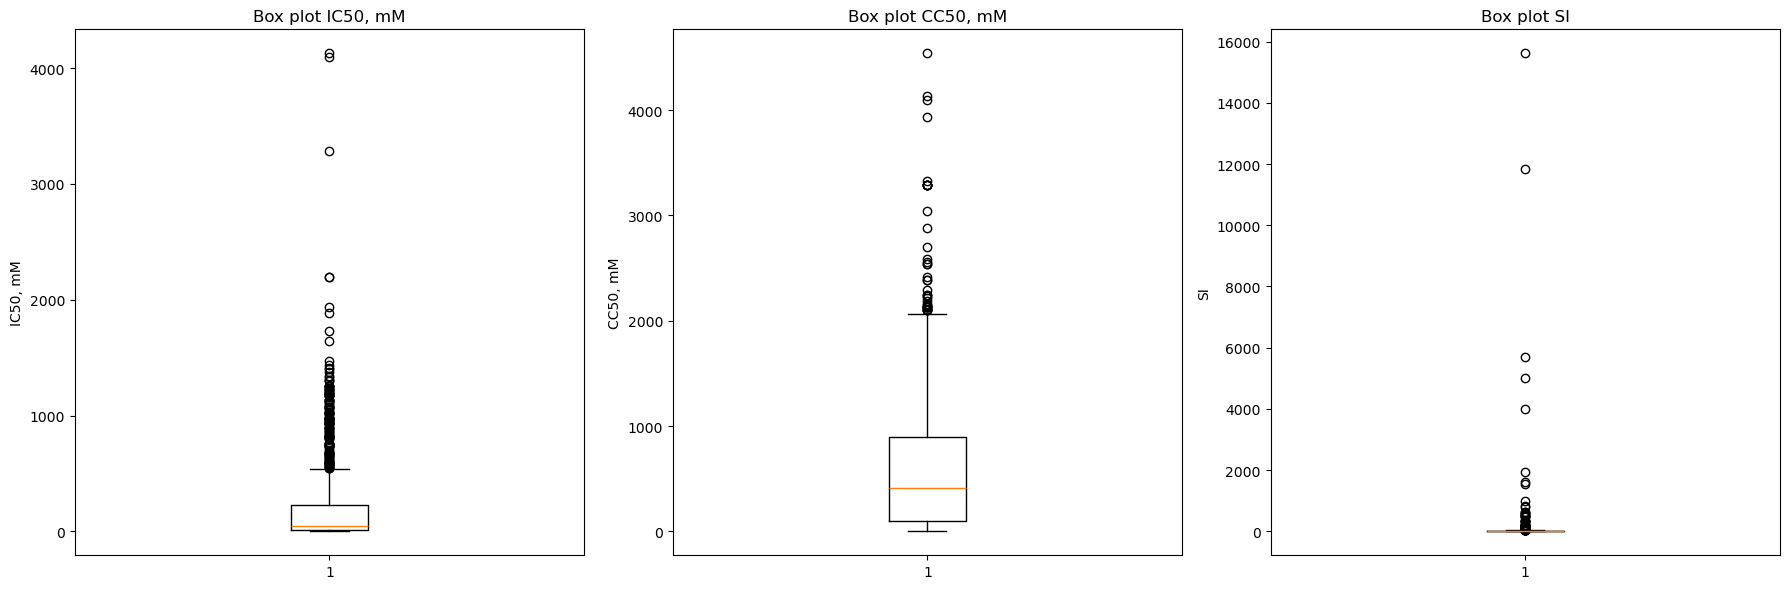

In [135]:
outliers_summary = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(target_vars):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    

    log_values = np.log10(df[var] + 1e-10)
    z_scores = np.abs(stats.zscore(log_values))
    outliers_z = df[z_scores > 3]
    
    outliers_summary[var] = {
        'IQR_outliers': len(outliers_iqr),
        'Z_score_outliers': len(outliers_z),
        'IQR_percentage': len(outliers_iqr) / len(df) * 100,
        'Z_score_percentage': len(outliers_z) / len(df) * 100
    }
    

    axes[i].boxplot(df[var])
    axes[i].set_title(f'Box plot {var}')
    axes[i].set_ylabel(var)
    
    print(f"\n{var}:")
    print(f"  Выбросы по IQR: {len(outliers_iqr)} ({len(outliers_iqr)/len(df)*100:.1f}%)")
    print(f"  Выбросы по Z-score (log): {len(outliers_z)} ({len(outliers_z)/len(df)*100:.1f}%)")

plt.tight_layout()
plt.savefig('outliers_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

При анализе выбросов наблюдаем картину существенной разности между методами обнаружения выбросов.

При этом видим, что при использовании Z-score критерия на логарифмированных данных, мы получаем совсем необольшой процент выбросов (1-2% выбросов).

Анализ признаков


In [136]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_cols if col not in target_vars and col != df.columns[0]]

print(f"Общее количество признаков: {len(feature_cols)}")

feature_stats = df[feature_cols].describe()

zero_var_features = []
for col in feature_cols:
    if df[col].std() == 0:
        zero_var_features.append(col)

print(f"Признаки с нулевой вариативностью: {len(zero_var_features)}")
if zero_var_features:
    print("Список:", zero_var_features[:10])  


low_var_features = []
for col in feature_cols:
    if df[col].std() > 0:
        cv = df[col].std() / abs(df[col].mean()) if df[col].mean() != 0 else float('inf')
        if cv < 0.1:
            low_var_features.append((col, cv))

print(f"Признаки с низкой вариативностью (CV < 0.1): {len(low_var_features)}")


feature_corr_matrix = df[feature_cols].corr().abs()
upper_triangle = feature_corr_matrix.where(
    np.triu(np.ones(feature_corr_matrix.shape), k=1).astype(bool)
)

high_corr_pairs = []
for col in upper_triangle.columns:
    for idx in upper_triangle.index:
        if upper_triangle.loc[idx, col] > 0.95:  
            high_corr_pairs.append((idx, col, upper_triangle.loc[idx, col]))

print(f"Пары признаков с корреляцией > 0.95: {len(high_corr_pairs)}")

print({
        'total_features': len(feature_cols),
        'zero_var_features': zero_var_features,
        'low_var_features': low_var_features,
        'high_corr_pairs': high_corr_pairs
    })


Общее количество признаков: 210
Признаки с нулевой вариативностью: 18
Список: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine']
Признаки с низкой вариативностью (CV < 0.1): 5
Пары признаков с корреляцией > 0.95: 91
{'total_features': 210, 'zero_var_features': ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan'], 'low_var_features': [('BCUT2D_MWLOW', 0.04710549812117566), ('BCUT2D_CHGHI', 0.06557444530239347), ('BCUT2D_CHGLO', 0.07195091824925219), ('BCUT2D_LOGPHI', 0.06352736269918492), ('BCUT2D_LOGPLOW', 0.0736575693605984)], 'high_corr_pairs': [('MaxAbsEStateIndex', 'MaxEStateIndex', 1.0), ('MolWt', 'HeavyAtomMolWt', 0.9968500699143528), ('MolWt', 'ExactMolWt', 0.9

Из анализа фичей видим, что мы имеем 18 штук признаков с 0 вариативностью. Например, fr_barbitur, fr_benzodiazepine, fr_azide и др. - химические группы, которых нет ни в одном соединении. 

Признаки с низкой вариативностью (5 шт.)

43% от всех возможных признаков участвуют в высококоррелированных парах.

Анализ важности признаков с помощью статистических тестов


In [137]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
feature_cols = [col for col in numeric_cols if col not in target_vars and col != df.columns[0]]

X = df[feature_cols]

X_clean = X.loc[:, X.std() > 0]


imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_clean), columns=X_clean.columns)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_clean.columns)

for target in target_vars:
    y = df[target]
    
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(X_scaled, y)
    

    feature_scores = pd.DataFrame({
        'feature': X_clean.columns,
        'f_score': selector.scores_,
        'p_value': selector.pvalues_
    }).sort_values('f_score', ascending=False)
    
    print(f"\nТоп-10 важных признаков для {target}:")
    print(feature_scores.head(10))
    
    significant = feature_scores[feature_scores['p_value'] < 0.05]
    print(f"Значимых признаков (p < 0.05): {len(significant)}")


Топ-10 важных признаков для IC50, mM:
          feature    f_score       p_value
96    VSA_EState4  81.218618  1.006196e-18
34          Chi2n  70.683284  1.432427e-16
57      PEOE_VSA7  70.055135  1.928666e-16
35          Chi2v  66.126110  1.245618e-15
128      fr_Ar_NH  64.077961  3.304791e-15
142  fr_Nhpyrrole  64.077961  3.304791e-15
39          Chi4v  63.021501  5.471663e-15
38          Chi4n  62.964951  5.621450e-15
36          Chi3n  60.919527  1.494902e-14
37          Chi3v  59.856583  2.487475e-14
Значимых признаков (p < 0.05): 103

Топ-10 важных признаков для CC50, mM:
            feature     f_score       p_value
121           MolMR  106.294569  9.380549e-24
45        LabuteASA  105.598842  1.288491e-23
6             MolWt  103.533461  3.310410e-23
8        ExactMolWt  103.490423  3.376215e-23
103  HeavyAtomCount  102.588923  5.100024e-23
28             Chi0  102.309710  5.795473e-23
31             Chi1  102.004866  6.663764e-23
7    HeavyAtomMolWt  101.108677  1.004778e-22


Основные результаты F-теста:

Проведен статистический анализ важности признаков для предсказания противовирусной активности (IC50), цитотоксичности (CC50) и индекса селективности (SI). После удаления константных признаков и предобработки данных получены следующие закономерности:
1. Различия в значимых признаках по целевым переменным:
IC50 (противовирусная активность):

Высокие F-статистики у электронных дескрипторов (VSA_EState, PEOE_VSA)
Важность топологических индексов связности (Chi2n, Chi2v)
Значимость ароматических функциональных групп (fr_Ar_NH)

CC50 (цитотоксичность):

Доминирование размерных характеристик (MolWt, LabuteASA, HeavyAtomCount)
Высокая значимость молекулярной рефракции (MolMR)
Важность индексов формы молекулы (Kappa1)

SI (индекс селективности):

Преобладание структурных дескрипторов (BalabanJ, RingCount)
Значимость специфических функциональных групп (fr_NH2)
Важность дескрипторов разветвленности

Статистическая значимость:
Большинство признаков показали статистическую значимость (p < 0.05), что указывает на богатую информативность химических дескрипторов для предсказания биологической активности.

PCA анализ для понимания структуры данных


Данные для PCA: (1001, 192)

Результаты PCA:
Исходное количество признаков: 192
Компонент для объяснения 90% дисперсии: 45
Компонент для объяснения 95% дисперсии: 59
Степень сжатия (90%): 4.3x


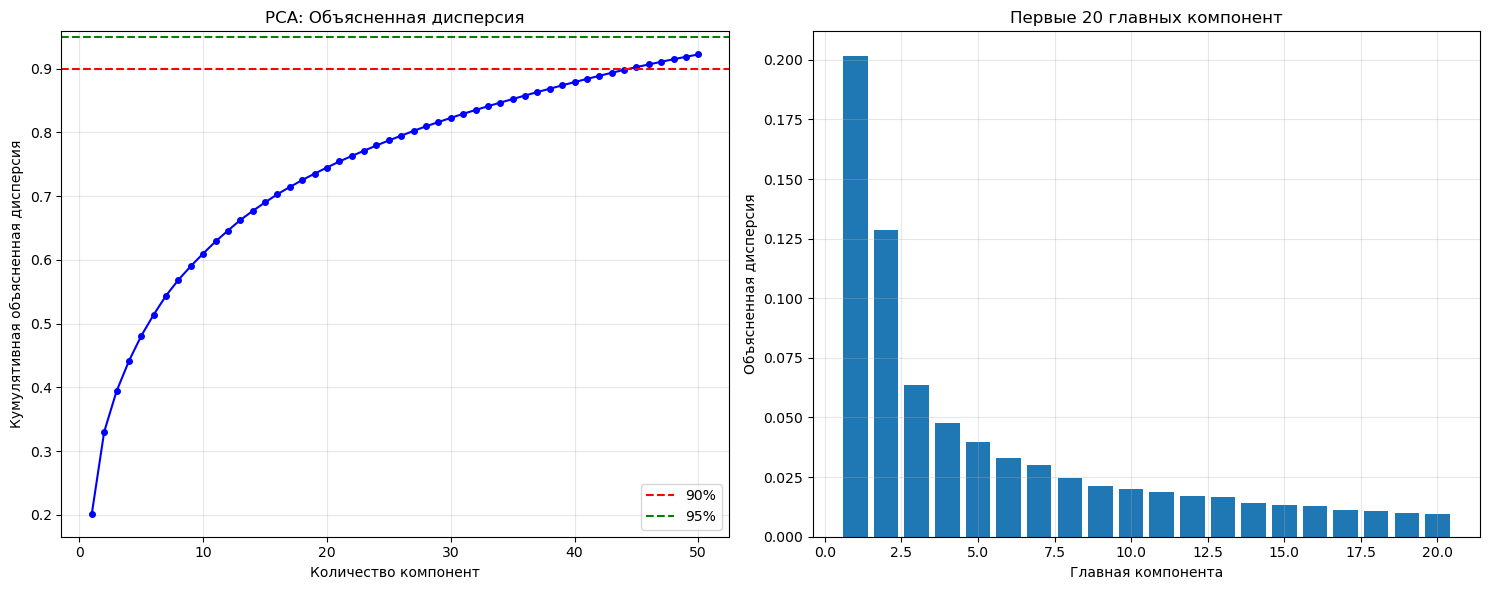

In [138]:
X_clean = df[feature_cols].select_dtypes(include=[np.number])
X_clean = X_clean.loc[:, X_clean.std() > 0]

X_clean = X_clean.loc[:, X.std() > 0]
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_clean), columns=X_clean.columns)


print(f"Данные для PCA: {X_clean.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


pca = PCA()
pca.fit(X_scaled)

cumsum_variance = np.cumsum(pca.explained_variance_ratio_)


n_components_90 = np.argmax(cumsum_variance >= 0.90) + 1
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1

print(f"\nРезультаты PCA:")
print(f"Исходное количество признаков: {X_clean.shape[1]}")
print(f"Компонент для объяснения 90% дисперсии: {n_components_90}")
print(f"Компонент для объяснения 95% дисперсии: {n_components_95}")
print(f"Степень сжатия (90%): {X_clean.shape[1]/n_components_90:.1f}x")


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


axes[0].plot(range(1, min(51, len(cumsum_variance) + 1)), 
             cumsum_variance[:50], 'bo-', markersize=4)
axes[0].axhline(y=0.90, color='r', linestyle='--', label='90%')
axes[0].axhline(y=0.95, color='g', linestyle='--', label='95%')
axes[0].set_xlabel('Количество компонент')
axes[0].set_ylabel('Кумулятивная объясненная дисперсия')
axes[0].set_title('PCA: Объясненная дисперсия')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].bar(range(1, min(21, len(pca.explained_variance_ratio_) + 1)), 
            pca.explained_variance_ratio_[:20])
axes[1].set_xlabel('Главная компонента')
axes[1].set_ylabel('Объясненная дисперсия')
axes[1].set_title('Первые 20 главных компонент')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Выводы по анализу главных компонент (PCA):
Основные результаты:
Проведен анализ главных компонент для снижения размерности данных. Из исходных 192 признаков получены следующие результаты:
Эффективность сжатия данных:

45 компонент сохраняют 90% информации (сжатие в 4.3 раза)
59 компонент сохраняют 95% информации (сжатие в 3.3 раза)

Анализ распределения дисперсии:
Первая главная компонента объясняет около 20% общей дисперсии, что указывает на наличие сильной корреляционной структуры в химических дескрипторах.
Вторая компонента добавляет еще 12-13% дисперсии, показывая важность нескольких ортогональных направлений изменчивости в данных.
Последующие компоненты показывают постепенное убывание вклада, что типично для химических данных с множественными корреляциями между дескрипторами.

Практические выводы:
- Значительная избыточность в исходных признаках - можно сократить размерность в 4 раза с потерей всего 10% информации
- PCA эффективен для предобработки данных перед машинным обучением
- Оптимальный выбор: использовать 45-50 компонент для баланса между сжатием и сохранением информации

Финальные выводы по исследовательскому анализу данных (EDA):
1. Характеристика датасета:

- 1001 соединение с 210 химическими дескрипторами
- 3 целевые переменные: IC50 (активность), CC50 (токсичность), SI (селективность)
- Данные содержат пропущенные значения и 18 константных признаков

2. Ключевые проблемы данных:

Распределения целевых переменных:

- Экстремальная правосторонняя асимметрия всех целевых переменных
- Логарифмическое преобразование критически необходимо для нормализации
- Наличие потенциальной бимодальности после логарифмирования

Качество признаков:

- 91 пара высококоррелированных признаков (r > 0.95) - серьезная мультиколлинеарность
- 18 константных признаков требуют удаления
- Значительная избыточность в химических дескрипторах

3. Взаимосвязи между переменными:

Целевые переменные:

- IC50 - CC50: умеренная корреляция (0.521) - частичный компромисс активность/токсичность
- SI независим от IC50 и CC50 - требует отдельного моделирования

Признаки и цели:

- IC50: электронные дескрипторы и топологические индексы
- CC50: размерные характеристики молекул
- SI: структурные особенности и разветвленность

4. Стратегия предобработки:

Обязательные шаги:

- Логарифмическое преобразование всех целевых переменных
- Удаление 18 константных признаков
- Импутация пропусков медианой
- Обработка мультиколлинеарности (удаление или PCA)

Опциональные улучшения:

- Анализ выбросов по Z-score на логарифмированных данных
- Feature selection по результатам F-теста
- PCA до 45 компонент для сжатия данных

5. Рекомендации для моделирования:

Выбор алгоритмов:

- Древесные методы (Random Forest, XGBoost) - устойчивы к выбросам и асимметрии
- Линейные методы - только после логарифмирования и обработки корреляций
- Разные подходы для каждой целевой переменной

Стратегия validation:

- Отдельные модели для IC50, CC50, SI
- Multi-output модели для IC50-CC50 (из-за корреляции)
- Кросс-валидация с учетом асимметрии данных

6. Биологическая интерпретация:

Практические выводы:

- Размер молекулы напрямую связан с токсичностью
- Электронные свойства определяют противовирусную активность
- Селективность зависит от уникальных структурных особенностей

7. Ожидаемые результаты:

После правильной предобработки ожидается создание эффективных предсказательных моделей для:

- Оптимизации активности лекарственных соединений
- Минимизации токсичности
- Максимизации селективности